# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd #импортируем библиотеку как pd

In [2]:
import seaborn as sns #импортируем библиотеку seaborn как sns для дальнейшей визуализации

In [3]:


try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [4]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


вывод--В двух столбцах есть пропущенные значения. Один из них — days_employed.Другой столбец с пропущенными значениями — total_income — хранит данные о доходах.

## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [6]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [7]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [8]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [9]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [10]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [11]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [12]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [13]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [14]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [15]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [17]:
data.duplicated().sum()

71

In [18]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [19]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [21]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [22]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

In [24]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data.info()#выводим сводную информацию о таблице


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21331 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               21331 non-null  int64  
 1   days_employed          21331 non-null  float64
 2   dob_years              21331 non-null  int64  
 3   education              21331 non-null  object 
 4   education_id           21331 non-null  int64  
 5   family_status          21331 non-null  object 
 6   family_status_id       21331 non-null  int64  
 7   gender                 21331 non-null  object 
 8   income_type            21331 non-null  object 
 9   debt                   21331 non-null  int64  
 10  total_income           21331 non-null  int64  
 11  purpose                21331 non-null  object 
 12  total_income_category  21331 non-null  object 
 13  purpose_category       21331 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 2.4+ 

In [25]:
data.shape# выводим размер таблицы


(21331, 14)

In [26]:
data.dtypes  # выводим информацию о типах данных в таблице


children                   int64
days_employed            float64
dob_years                  int64
education                 object
education_id               int64
family_status             object
family_status_id           int64
gender                    object
income_type               object
debt                       int64
total_income               int64
purpose                   object
total_income_category     object
purpose_category          object
dtype: object

In [27]:
data.columns # выводим названия столбцов

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose', 'total_income_category', 'purpose_category'],
      dtype='object')

In [28]:
data.head()#знакомимся с таблицей

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [29]:
data['debt'].unique()#смотрим уникальные значение столбца debt


array([0, 1])

In [30]:
data['children'].unique()#смотрим уникальные значение столбца children

array([1, 0, 3, 2, 4, 5])

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

групируем по числу детей и находим среднее просрочки из стобца debt

In [31]:
data.groupby('children')['debt'].mean()

children
0    0.075438
1    0.092346
2    0.094542
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64

In [32]:
data.groupby('children')['debt'].mean()*100   #находим процент просрочки

children
0    7.543822
1    9.234609
2    9.454191
3    8.181818
4    9.756098
5    0.000000
Name: debt, dtype: float64

или так

In [33]:
a=data.groupby('children')['debt'].sum()/data.groupby('children')['debt'].count()*100#находим процент
a

children
0    7.543822
1    9.234609
2    9.454191
3    8.181818
4    9.756098
5    0.000000
Name: debt, dtype: float64

In [34]:
data.groupby('children').agg({'debt':['count','sum','mean']})#Извените не смог сделать так что бы средное как процент показывал

debt                
          count   sum      mean
children                       
0         14091  1063  0.075438
1          4808   444  0.092346
2          2052   194  0.094542
3           330    27  0.081818
4            41     4  0.097561
5             9     0  0.000000

In [57]:
#Код ревьюера
data.groupby('children').agg({'debt':['count','sum','mean']})\
   .style.format({('debt', 'mean') : '{:.2%}'})

In [35]:
data.pivot_table(index='children',values='debt',margins=True, aggfunc=['count','sum','mean'])#то же самое с pivot_table

,count,sum,mean
,debt,debt,debt
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000
All,21331,1732,0.081196


все просрочки 8.1196 процентов

<AxesSubplot:ylabel='debt'>

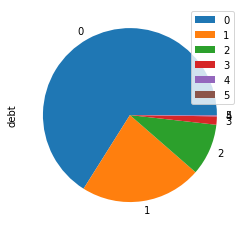

In [36]:


data.groupby(['children']).count().plot(kind='pie', y='debt')#выводим диаграмму по количеству заемщиков


<AxesSubplot:xlabel='children'>

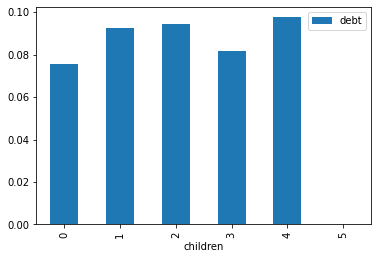

In [37]:
data.groupby(['children']).mean().plot(kind='bar', y='debt')#диограмма по долям просрочки

<div style="border:solid blue 3px; padding: 20px">
<b>Общий комментарий ревьюера:</b>

Поправь пожалуйста код, чтобы я смог проверить твою работу до конца.</div>

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

**Вывод:**  мы видим что  у кого 5 детей по нашим данным не один не просрочил выплаты.остальные в пределах погрешности

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [38]:
data.groupby('family_status')['debt'].mean().sort_values(ascending=False)


family_status
Не женат / не замужем    0.097639
гражданский брак         0.093130
женат / замужем          0.075606
в разводе                0.070648
вдовец / вдова           0.066246
Name: debt, dtype: float64

In [39]:
(data.groupby('family_status')['debt'].mean()*100).sort_values(ascending=False)#находим процент

family_status
Не женат / не замужем    9.763948
гражданский брак         9.313014
женат / замужем          7.560558
в разводе                7.064760
вдовец / вдова           6.624606
Name: debt, dtype: float64

In [40]:
data.groupby('family_status').agg({'debt':['count','sum','mean']})

debt               
                       count  sum      mean
family_status                              
Не женат / не замужем   2796  273  0.097639
в разводе               1189   84  0.070648
вдовец / вдова           951   63  0.066246
гражданский брак        4134  385  0.093130
женат / замужем        12261  927  0.075606

In [41]:

data.pivot_table(index='family_status',values='debt',margins=True, aggfunc=['count','sum','mean'])#выводим сводную таблицу

,count,sum,mean
,debt,debt,debt
family_status,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606
All,21331,1732,0.081196


<AxesSubplot:ylabel='debt'>

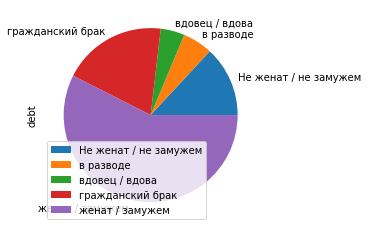

In [42]:
data.groupby(['family_status']).count().plot(kind='pie', y='debt')#выводим наглядно количество заемщиков по категориям

<AxesSubplot:xlabel='family_status'>

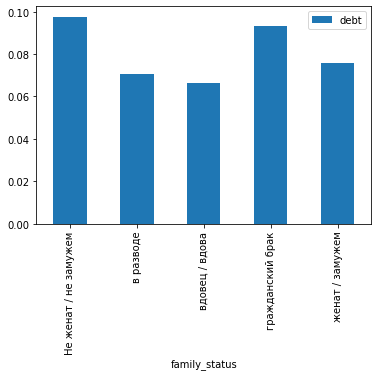

In [43]:
data.groupby(['family_status']).mean().plot(kind='bar', y='debt')#выводим наглядно среднее просрочки заемщиков по категориям

**Вывод:**из наших данных следует что вдовец\вдова самые надежные кредиторы а холостые и кто в гражданском браке очень часто опаздывают с возвратом кредита

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [44]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
(data.groupby('total_income_category')['debt'].mean()*100).sort_values(ascending=False)#получаем процент ненадежных заемщиков по категориям

total_income_category
E    9.090909
C    8.498210
A    8.000000
B    7.060231
D    6.017192
Name: debt, dtype: float64

In [45]:
data.groupby('total_income_category').agg({'debt':['count','sum','mean']})

debt                
                       count   sum      mean
total_income_category                       
A                         25     2  0.080000
B                       5014   354  0.070602
C                      15921  1353  0.084982
D                        349    21  0.060172
E                         22     2  0.090909

In [46]:
data.pivot_table(index='total_income_category',values='debt',margins=True, aggfunc=['count','sum','mean'])#выводим сводную таблицу


,count,sum,mean
,debt,debt,debt
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15921,1353,0.084982
D,349,21,0.060172
E,22,2,0.090909
All,21331,1732,0.081196


<AxesSubplot:ylabel='debt'>

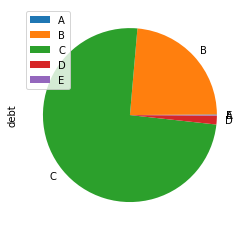

In [47]:
data.groupby(['total_income_category']).count().plot(kind='pie', y='debt')#выводим наглядно количество заемщиков по категориям

<AxesSubplot:xlabel='total_income_category'>

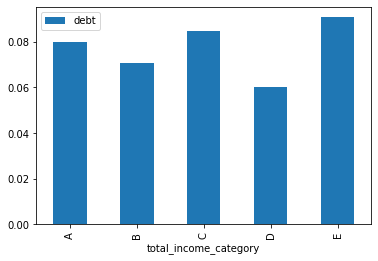

In [48]:
data.groupby(['total_income_category']).mean().plot(kind='bar', y='debt')#выводим наглядно количество заемщиков по категориям

**Вывод:** из наших данных следует что люди с доходом категории D(от 50000 до 200000)  самые надежные кредиторы а в категории  С(от200000 до1000000) и E (от 30001 до 50000)самые ненадежные.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [49]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
(data.groupby('purpose_category')['debt'].mean()*100).sort_values(ascending=False)#Находим процент

purpose_category
операции с автомобилем      9.347978
получение образования       9.252758
проведение свадьбы          7.911803
операции с недвижимостью    7.255139
Name: debt, dtype: float64

In [50]:
data.groupby('purpose_category').agg({'debt':['count','sum','mean']})

debt               
                          count  sum      mean
purpose_category                              
операции с автомобилем     4279  400  0.093480
операции с недвижимостью  10751  780  0.072551
получение образования      3988  369  0.092528
проведение свадьбы         2313  183  0.079118

In [51]:
data.pivot_table(index='purpose_category',values='debt',margins=True, aggfunc=['count','sum','mean'])#выводим сводную таблицу


,count,sum,mean
,debt,debt,debt
purpose_category,,,
операции с автомобилем,4279,400,0.093480
операции с недвижимостью,10751,780,0.072551
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118
All,21331,1732,0.081196


<AxesSubplot:ylabel='debt'>

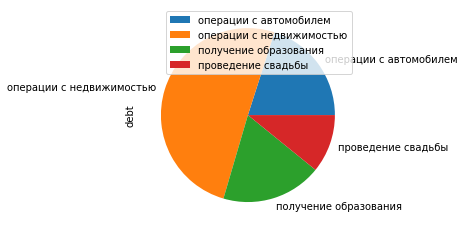

In [52]:
data.groupby(['purpose_category']).count().plot(kind='pie', y='debt')

<AxesSubplot:xlabel='purpose_category'>

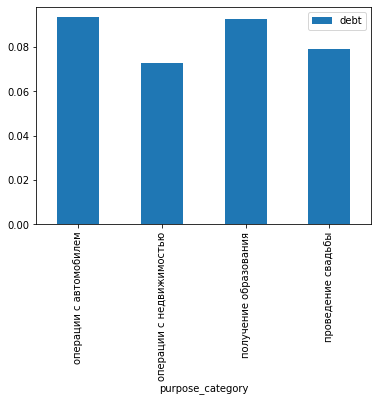

In [53]:
data.groupby(['purpose_category']).mean().plot(kind='bar', y='debt')

**Вывод:** операции с автомобилем самые не надежные кредиторы потом получение образования потом проведение свадьбы и самые надежные операции с недвижимостью 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* человеческый фактор или некоректная работа программы

Пропуски бывают трёх типов:
    Полностью случайные: если вероятность встретить пропуск независит ни от каких других значений.
    Случайные:если вероятность пропуска зависит от других значений в
наборе данных, но не от значений собственного столбца.
    Неслучайные: если вероятность пропуска зависит от других
значений, в том числе и от значений собственного столбца

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:*  медианное значение не может сильно отличатся и не будет искажать исходные данные. среднее значение может сильно исказить наши расчеты если в исходных данных есть экстремально большие или маленькие значение.

### Шаг 4: общий вывод.

Напишите ваш общий вывод.

самые надежные кредиторы это пожелые люди женатие\замужные более 5  детей с зарплатой от 50000 до 200000 
самые не надежные это молодые холостые без детей с доходом категории С(от200000 до1000000) и E (от 30001 до 50000)

все просрочки 8.1196 процентов
Вывод: мы видим что у кого 5 детей по нашим данным не один не просрочил выплаты. А у кого нет детей брали много и платили тоже довольно не плохо. Но так как разброс в количестве займов слишком большой я бы не стал делать выводы по возврату займов. однозначно одно что у кого нет детей больше берут заем.

очевидно что вдовец\вдова самые надежные кредиторы а холостые и кто в гражданском браке очень часто опаздывают с возвратом кредита возможно это связано со стилем жизни людей.


из наших данных следует что люди с доходом категории D(от 50000 до 200000) самые надежные кредиторы а в категории С(от200000 до1000000) и E (от 30001 до 50000)самые ненадежные. в группах А и Е очень мало займов так что возможно не корректные выводи по ним а в категории С охотно берут заем

операции с автомобилем самые не надежные кредиторы потом получение образования потом проведение свадьбы и самые надежные операции с недвижимостью. Дополнительно стоит сравнить эти данные с данными по возрасту возможны какие то зависимости.

требуется изучить образование возраст и вообще дело передать психологам))))

In [54]:
data.pivot_table(index=['family_status','children','purpose_category','total_income_category'],values='debt',margins=True, aggfunc=['mean']).max()

mean  debt    1.0
dtype: float64